In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint

import scipy.stats as stats

#from census import Census

#Need api file



In [2]:
# import housing file
US_housing_file = "Housing Prices for US.csv"
US_housing_data = pd.read_csv(US_housing_file)
US_housing_data.head()

,DATE,MSPUS
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [3]:
US_housing= US_housing_data.rename(columns={"MSPUS":"Avg Home Price","DATE":"Date (Quarterly)"})
US_housing.head()

,Date (Quarterly),Avg Home Price
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


<function matplotlib.pyplot.show(*args, **kw)>

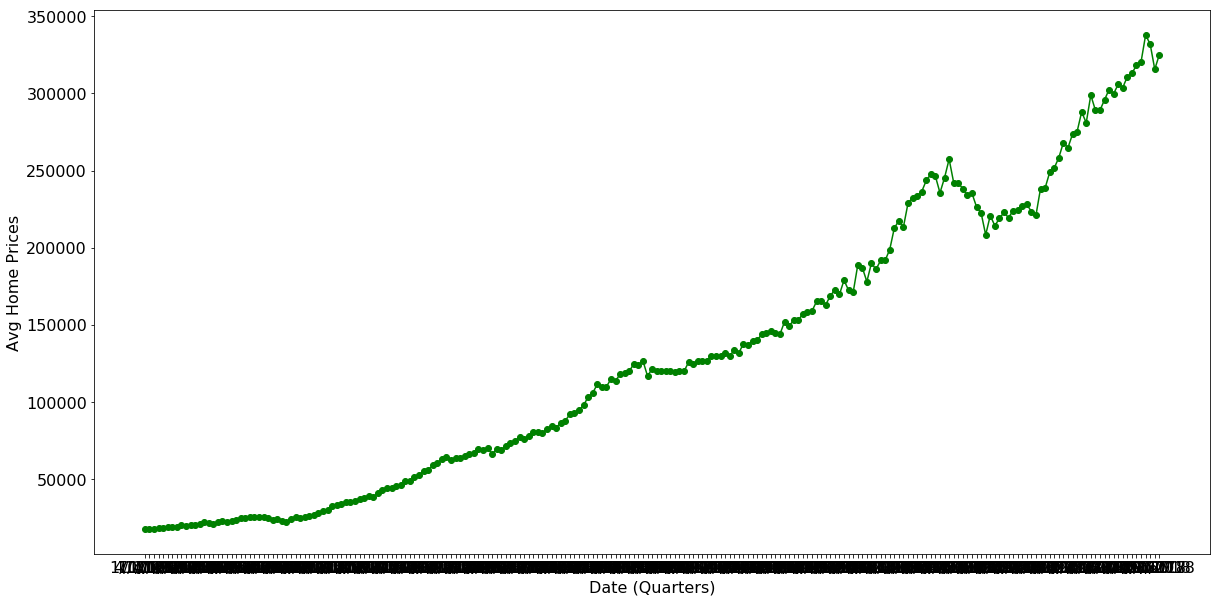

In [4]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date (Quarters)")
ax1.set_ylabel("Avg Home Prices")

data1 = US_housing["Avg Home Price"]
x_axis1 = US_housing["Date (Quarterly)"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

plt.show



In [5]:
#Import data from FRED

# https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456
FRED_url = "https://api.stlouisfed.org/fred/series/observations?series_id="

housing_US_seriesid = "MSPUS"
housing_region_seriesid = "ASPS,ASPW,ASPNE,ASPMW,#"
fedfund_seriesid = "FEDFUNDS"

#set the data frequency (d=daily,w=weekly,m=monthly,a=annually)
frequency = "a"

# How will data be summarized (avg, sum, eop=end of period, default is avg)
aggregation = "avg"

api_key = "fd8c22bb4ce3ecd6d465947f86b42594"

query_url_housing = f'{FRED_url}{housing_US_seriesid}&api_key={api_key}&file_type=json'

In [6]:
US_housing_response = requests.get(query_url_housing).json()
pprint(US_housing_response)

{'count': 223,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1963-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '17800'},
                  {'date': '1963-04-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '18000'},
                  {'date': '1963-07-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '17900'},
                  {'date': '1963-10-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '18500'},
                  {'date': '1964-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                  

                   'value': '302500'},
                  {'date': '2016-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '299800'},
                  {'date': '2016-04-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '306000'},
                  {'date': '2016-07-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '303800'},
                  {'date': '2016-10-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '310900'},
                  {'date': '2017-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '313100'},
                  {'date': '2017-04-01',
                   '

In [7]:
US_housing_date=[]
US_housing_date=US_housing_response["observations"][0]["date"]
US_housing_date

len(US_housing_response["observations"])

for observation in US_housing_response["observations"]:
    #US_housing_date.append(observation["date"])
    print(observation["date"])
US_housing_date

1963-01-01
1963-04-01
1963-07-01
1963-10-01
1964-01-01
1964-04-01
1964-07-01
1964-10-01
1965-01-01
1965-04-01
1965-07-01
1965-10-01
1966-01-01
1966-04-01
1966-07-01
1966-10-01
1967-01-01
1967-04-01
1967-07-01
1967-10-01
1968-01-01
1968-04-01
1968-07-01
1968-10-01
1969-01-01
1969-04-01
1969-07-01
1969-10-01
1970-01-01
1970-04-01
1970-07-01
1970-10-01
1971-01-01
1971-04-01
1971-07-01
1971-10-01
1972-01-01
1972-04-01
1972-07-01
1972-10-01
1973-01-01
1973-04-01
1973-07-01
1973-10-01
1974-01-01
1974-04-01
1974-07-01
1974-10-01
1975-01-01
1975-04-01
1975-07-01
1975-10-01
1976-01-01
1976-04-01
1976-07-01
1976-10-01
1977-01-01
1977-04-01
1977-07-01
1977-10-01
1978-01-01
1978-04-01
1978-07-01
1978-10-01
1979-01-01
1979-04-01
1979-07-01
1979-10-01
1980-01-01
1980-04-01
1980-07-01
1980-10-01
1981-01-01
1981-04-01
1981-07-01
1981-10-01
1982-01-01
1982-04-01
1982-07-01
1982-10-01
1983-01-01
1983-04-01
1983-07-01
1983-10-01
1984-01-01
1984-04-01
1984-07-01
1984-10-01
1985-01-01
1985-04-01
1985-07-01

'1963-01-01'

In [8]:
# pull in region data (frequency?)

In [9]:
# ANOVA between regions
# chi-squared test between regions